Kelompok :
* Achmad Iqbal Al Faizin
* Angga Prastyo
* Areyano Virsel Nawadrisa
* Muhammad Taufik Al Aziz

## Import library dan dataset

In [1]:
# Import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../input/premier-league-player-stats-data/Premier League Player Stats.csv')
df

,Rank,PLAYER,TEAM,GP,GS,MIN,G,ASST,SHOTS,SOG
0,1,Jamie Vardy,Leicester City,35,34,3034,23,5,71,43
1,2,Danny Ings,Southampton,38,32,2812,22,2,66,38
2,3,Pierre-Emerick Aubameyang,Arsenal,36,35,3138,22,3,70,42
3,4,Raheem Shaquille Sterling,Manchester City,33,30,2660,20,1,68,38
4,5,Mohamed Salah Ghaly,Liverpool,34,33,2884,19,10,95,59
...,...,...,...,...,...,...,...,...,...,...
535,536,Dennis Cirkin,Tottenham Hotspur,0,0,0,0,0,0,0
536,537,Darnell Johnson,Leicester City,0,0,0,0,0,0,0
537,538,Timothy Fosu-Mensah,Manchester United,3,2,136,0,0,1,0
538,539,Conor Coventry,West Ham United,0,0,0,0,0,0,0


## Data Understanding
Berikut penjelasan mengenai fitur pada dataset
* Rank : Rank of the player
* Player : Player name
* Team : Player team name
* GP : Games played
* GS : Games started
* MIN : Minutes played
* G : Goals
* ASST : Assists
* SHOTS : Total shots
* SOG : Shots on goal

In [3]:
df.shape

(540, 10)

## Data Cleaning
* Kita tidak memerlukan kolom Rank, yaitu karena kolom tersebut hanya berisi angka yang berfungsi untuk mengurutkan data.
* Pada kasus clustering kali ini kita memerlukan kolom Assist, yaitu karena jumlah Assist juga dihitung sebagai kontribusi pemain terhadap tim

In [4]:
# Menghapus kolom yang tidak digunakan
dataset = df.drop(['Rank'], axis = 1)
dataset.head()

,PLAYER,TEAM,GP,GS,MIN,G,ASST,SHOTS,SOG
0,Jamie Vardy,Leicester City,35,34,3034,23,5,71,43
1,Danny Ings,Southampton,38,32,2812,22,2,66,38
2,Pierre-Emerick Aubameyang,Arsenal,36,35,3138,22,3,70,42
3,Raheem Shaquille Sterling,Manchester City,33,30,2660,20,1,68,38
4,Mohamed Salah Ghaly,Liverpool,34,33,2884,19,10,95,59


* Cek nilai null pada dataset

In [5]:
dataset.isna().sum()

PLAYER    0
TEAM      0
GP        0
GS        0
MIN       0
G         0
ASST      0
SHOTS     0
SOG       0
dtype: int64

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   PLAYER  540 non-null    object
 1   TEAM    540 non-null    object
 2   GP      540 non-null    int64 
 3   GS      540 non-null    int64 
 4   MIN     540 non-null    int64 
 5   G       540 non-null    int64 
 6   ASST    540 non-null    int64 
 7   SHOTS   540 non-null    int64 
 8   SOG     540 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 38.1+ KB


Karena tidak terdapat adanya missing value dan duplicated data, maka data siap digunakan

## Exploratory Data Analysis (EDA)
### Melihat analisis data berdasarkan Team

(470, 9)
                          TEAM
Manchester United           27
Newcastle United            26
Arsenal                     26
Aston Villa                 26
Chelsea                     26
Norwich City                26
Watford                     25
Bournemouth                 25
Liverpool                   24
West Ham United             24
Sheffield United            23
Tottenham Hotspur           23
Southampton                 23
Crystal Palace              22
Leicester City              22
Manchester City             22
Everton                     22
Brighton and Hove Albion    21
Burnley                     19
Wolverhampton Wanderers     18


<AxesSubplot:>

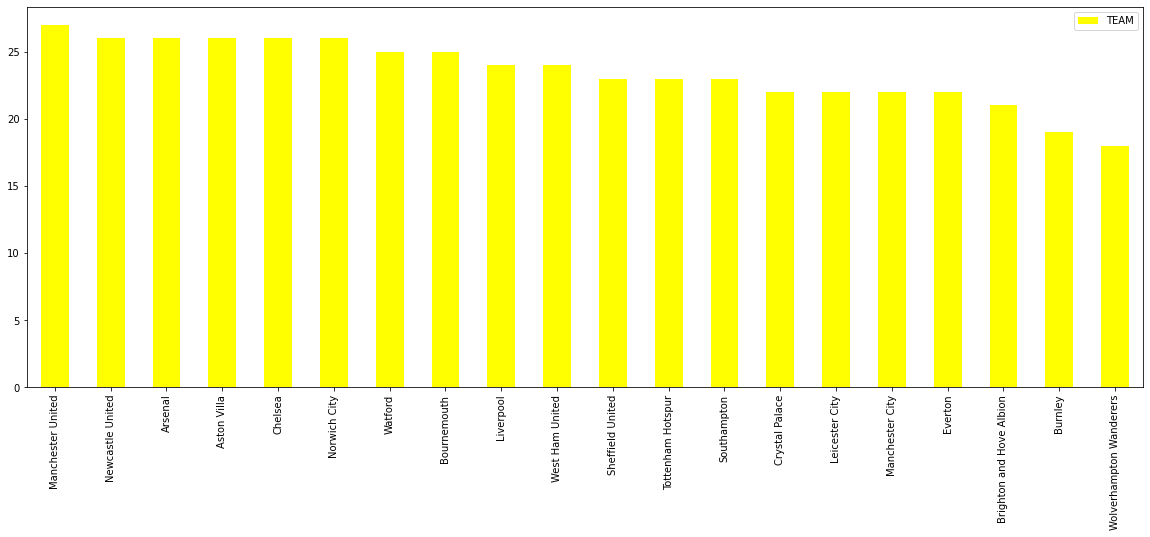

In [7]:
# Melihat jumlah pemain yang pernah dimainkan tiap tim
df_appear = dataset[(dataset.MIN > 0) ]
print(df_appear.shape)

df_appear = pd.DataFrame(df_appear['TEAM'].value_counts())
print(df_appear)

df_appear.plot.bar(color = 'yellow', figsize = (20, 7))

Terlihat mayoritas tim memainkan 20 lebih pemain dalam satu musim, dengan tim paling banyak memainkan pemain yaitu Manchester United

(251, 9)
                          TEAM
Arsenal                     17
Liverpool                   17
Newcastle United            16
Chelsea                     16
Aston Villa                 14
West Ham United             14
Leicester City              14
Manchester City             13
Manchester United           12
Southampton                 12
Bournemouth                 12
Wolverhampton Wanderers     11
Tottenham Hotspur           11
Brighton and Hove Albion    11
Watford                     11
Sheffield United            11
Everton                     11
Burnley                     10
Norwich City                 9
Crystal Palace               9


<AxesSubplot:>

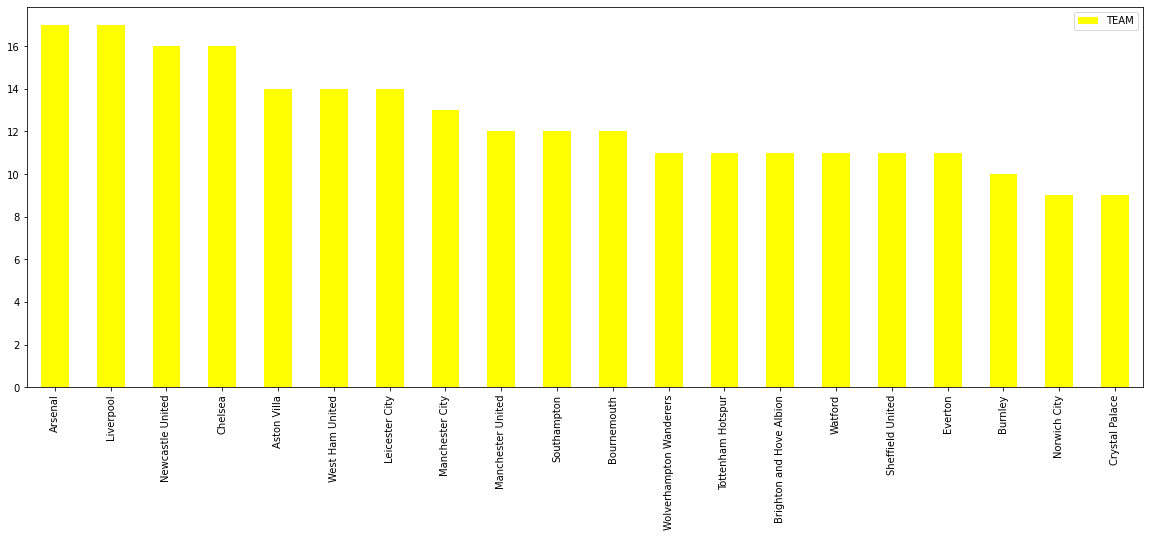

In [8]:
# Melihat jumlah pemain yang mencetak goal pada tiap tim
team_goal = dataset[(dataset.G > 0) ]
print(team_goal.shape)

team_goal = pd.DataFrame(team_goal['TEAM'].value_counts())
print(team_goal)

team_goal.plot.bar(color = 'yellow', figsize = (20, 7))

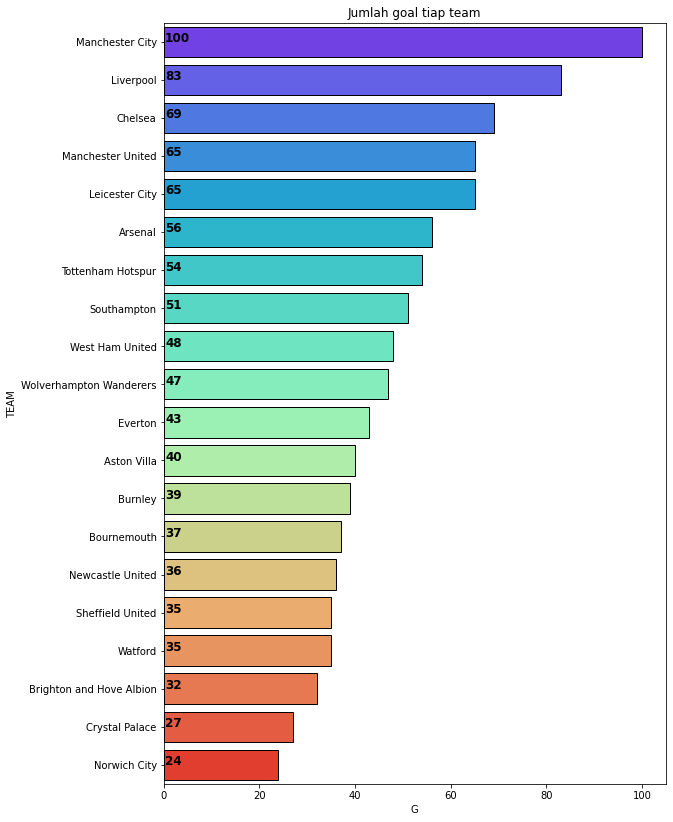

In [9]:
# Melihat jumlah goal pada tiap tim

goals = dataset.groupby("TEAM")["G"].sum().reset_index().sort_values(by = "G", ascending = False)

plt.figure(figsize = (9,14))
ax = sns.barplot(x = "G", y = "TEAM",
                 data = goals, palette = "rainbow",
                 linewidth = 1, edgecolor = "k")
for i,j in enumerate(goals["G"][:20]):
    ax.text(.3, i, j, weight = "bold", color = "k", fontsize = 12)
plt.title("Jumlah goal tiap team")
plt.show()

Terlihat bahwa jumlah goal pada tiap tim berbeda-beda, dimana Manchester City sebagai tim dengan jumlah gol terbanyak yaitu 100.

### Plotting Semua Fitur
Melakukan plotting untuk seluruh fitur yang terdapat dalam dataset menggunakan histogram

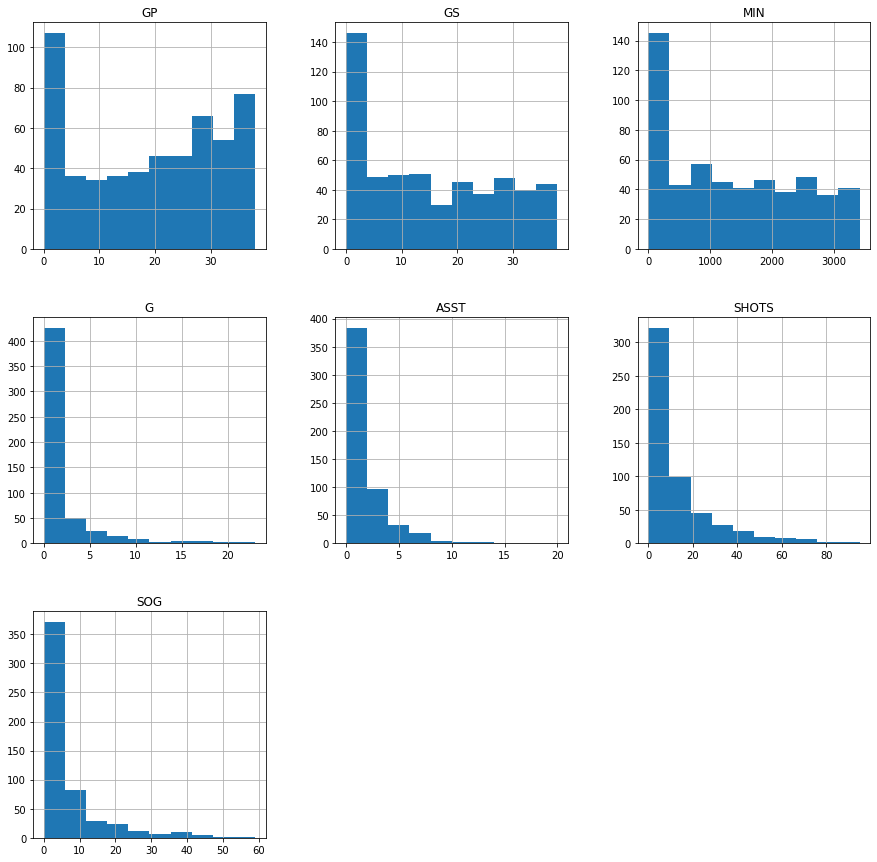

In [10]:
dataset.iloc[:,:].hist(figsize = (15,15))
plt.show()

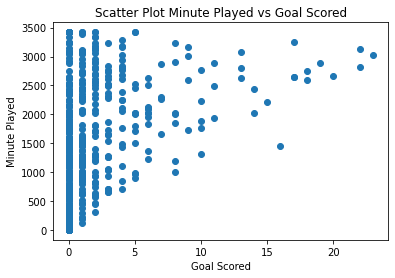

In [11]:
# Bivariate analysis Minute Played dan Goal Scored.
# Menggunakan scatter plot.

plt.scatter(dataset['G'], dataset['MIN'])
plt.xlabel('Goal Scored')
plt.ylabel('Minute Played')
plt.title('Scatter Plot Minute Played vs Goal Scored')
plt.show()

### Corelation Matrix

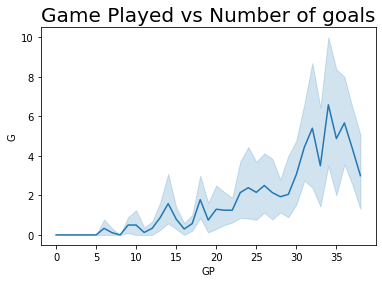

In [12]:
# Korelasi antara Game Played vs Goals
sns.lineplot(dataset['GP'], dataset['G'])
plt.title('Game Played vs Number of goals', fontsize = 20)

plt.show()

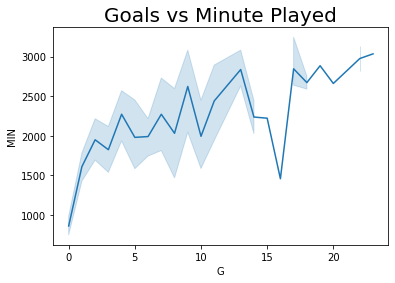

In [13]:
# Korelasi antara Goals vs Minute Played
sns.lineplot(dataset['G'], dataset['MIN'])
plt.title('Goals vs Minute Played', fontsize = 20)

plt.show()

* Melihat matriks korelasi antar fitur

<AxesSubplot:>

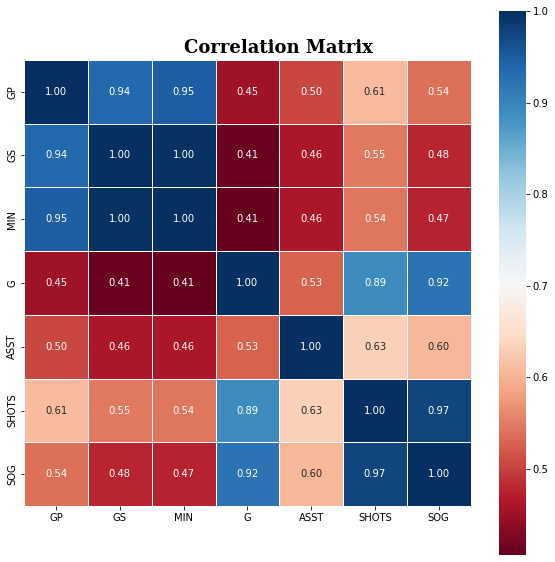

In [14]:
f, ax = plt.subplots(1, 1, figsize = (10, 10))

ax.text(2.5, -0.1, 'Correlation Matrix', fontsize = 18, fontweight = 'bold', fontfamily = 'serif')
sns.heatmap(dataset.corr(), annot = True, fmt = '.2f', cmap = 'RdBu', 
            square = True, linewidth = 0.7, ax = ax)

Berdasarkan heatmap pada Correlation Matrix diatas, terlihat bahwa fitur yang memiliki korelasi paling tinggi yakni :
* Shots dengan Shot On Goal (0.97)
* Game Played dengan Minute Played (0.95)
* Game Played dengan Game Started (0.94)
* Shot On Goal dengan Goal (0.92)

## Data Preparation
* Pada kasus ini kita akan mengetahui pengelompokan produktivitas/kontribusi pemain berdasarkan jumlah gol, assist, dan fitur lainnya. Untuk itu disini hanya dipilih pemain yang memilik minimal 1 Match Played

In [15]:
# Memilih data player yang memiliki minimal 1 Game Played
data_filter = dataset[(dataset['GP'] > 0)]
data_filter

,PLAYER,TEAM,GP,GS,MIN,G,ASST,SHOTS,SOG
0,Jamie Vardy,Leicester City,35,34,3034,23,5,71,43
1,Danny Ings,Southampton,38,32,2812,22,2,66,38
2,Pierre-Emerick Aubameyang,Arsenal,36,35,3138,22,3,70,42
3,Raheem Shaquille Sterling,Manchester City,33,30,2660,20,1,68,38
4,Mohamed Salah Ghaly,Liverpool,34,33,2884,19,10,95,59
...,...,...,...,...,...,...,...,...,...
522,Max Thompson,Burnley,1,0,2,0,0,0,0
523,Jake Vokins,Southampton,1,1,90,0,0,1,0
526,Tommy Doyle,Manchester City,1,0,15,0,0,1,1
531,Jordan Thomas,Norwich City,1,0,1,0,0,0,0


* Gambar dibawah adalah persebaran data jika dilihat hanya dari total 'Game Played' dan total 'Goal' yang berhasil dicetak.

<function matplotlib.pyplot.show(close=None, block=None)>

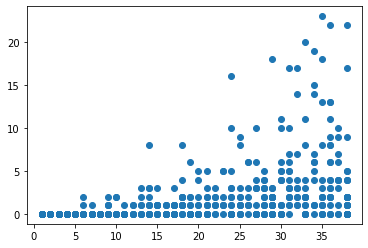

In [16]:
plt.scatter(data_filter.iloc[:,2], data_filter.iloc[:,5])
plt.show

* Gambar dibawah adalah persebaran data jika dilihat hanya dari total 'Game Played' dan total 'Assist' yang berhasil dicetak.

<function matplotlib.pyplot.show(close=None, block=None)>

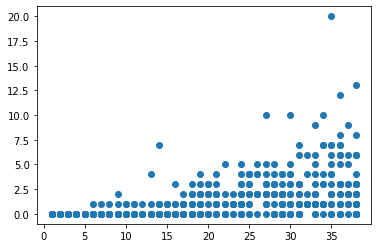

In [17]:
plt.scatter(data_filter.iloc[:,2], data_filter.iloc[:,6])
plt.show

In [18]:
# Memilih data yang digunakan untuk algoritma clustering
data = data_filter[['GP',	'GS',	'MIN',	'G', 'ASST',	'SHOTS',	'SOG']]
data

,GP,GS,MIN,G,ASST,SHOTS,SOG
0,35,34,3034,23,5,71,43
1,38,32,2812,22,2,66,38
2,36,35,3138,22,3,70,42
3,33,30,2660,20,1,68,38
4,34,33,2884,19,10,95,59
...,...,...,...,...,...,...,...
522,1,0,2,0,0,0,0
523,1,1,90,0,0,1,0
526,1,0,15,0,0,1,1
531,1,0,1,0,0,0,0


## K-Means Clustering
### Elbow Method
* Elbow Method digunakan dalam algoritma unsupervised learning untuk menentukan jumlah cluster optimal yang harus digunakan untuk menemukan cluster tertentu yang tidak diketahui dalam populasi.
* Kali ini menggunakan library **yellowbrick** untuk mengimplementasikan elbow method sederhana dan untuk menentukan jumlah clster yang sesuai dalam algoritma KMeans nantinya.

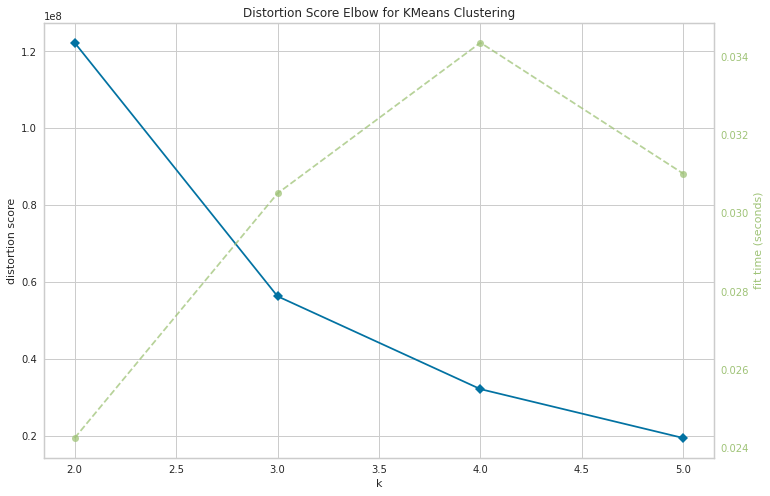

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.spatial.distance import cdist
from yellowbrick.cluster import KElbowVisualizer

fig = plt.figure(figsize=(12,8))

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,6))

# Fit the data to the visualizer
visualizer.fit(data)
visualizer.poof()

* Dari diagram elbow method diatas terlihat bahwa jumlah cluster yang optimal yaitu 3

### K-Means Algorithm

In [20]:
# Membuat model dengan nilai cluster = 3
kmeans = KMeans(n_clusters = 3, random_state = 0)
kmeans.fit_predict(data)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 0, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 2, 0, 1, 2, 1, 2, 2, 1, 1, 0, 1, 0, 1, 0, 2,
       2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 0, 2, 2, 2,
       1, 2, 2, 1, 2, 1, 0, 2, 2, 1, 2, 0, 2, 2, 0, 2, 1, 2, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 2, 1, 1, 1, 1, 2, 0, 2, 2, 2, 0, 1, 1, 2, 2, 1,
       2, 2, 0, 1, 2, 0, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2,
       2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 1, 2, 2, 0, 0, 0, 2,
       1, 1, 1, 2, 2, 0, 0, 1, 1, 0, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 0,
       1, 1, 2, 2, 0, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 1, 1, 0, 1, 1, 2, 1,
       1, 0, 1, 2, 2, 0, 2, 1, 0, 2, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 2, 1, 1, 1, 2, 0, 0,
       1, 1, 2, 1, 2, 1, 1, 0, 0, 1, 1, 1, 2, 0, 1, 2, 1, 2, 0, 1, 1, 2,
       2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,

In [21]:
# Memasukan nilai clusters ke dataset
data["Cluster"] = kmeans.labels_
data

,GP,GS,MIN,G,ASST,SHOTS,SOG,Cluster
0,35,34,3034,23,5,71,43,2
1,38,32,2812,22,2,66,38,2
2,36,35,3138,22,3,70,42,2
3,33,30,2660,20,1,68,38,2
4,34,33,2884,19,10,95,59,2
...,...,...,...,...,...,...,...,...
522,1,0,2,0,0,0,0,0
523,1,1,90,0,0,1,0,0
526,1,0,15,0,0,1,1,0
531,1,0,1,0,0,0,0,0


In [22]:
# Menghitung jumlah tuple pada tiap cluster yang terbentuk
data["Cluster"].value_counts()

0    177
2    149
1    144
Name: Cluster, dtype: int64

### Visualizing

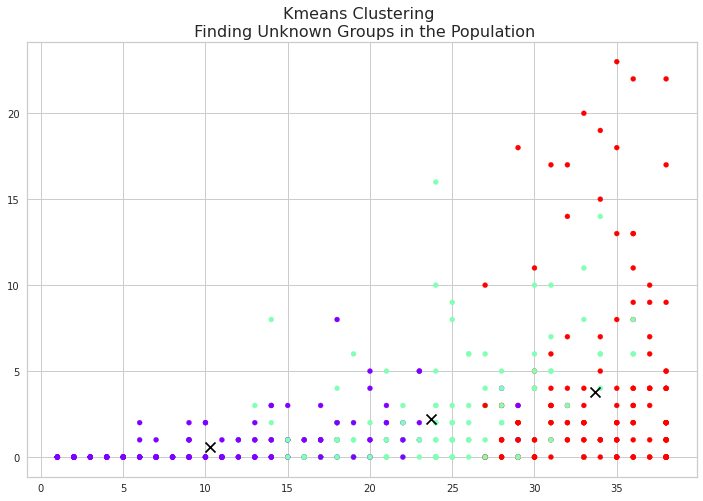

In [23]:
# Visualisasi hasil cluster
fig = plt.figure(figsize = (12,8))

plt.scatter(data.iloc[:,0], data.iloc[:,3], c = kmeans.labels_, cmap = "rainbow", s = 25)
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,3], color = 'black', marker = "x", s=100)
plt.title("Kmeans Clustering \n Finding Unknown Groups in the Population", fontsize = 16)
plt.show()

## Hierarchical Clustering
### Algoritma Hierarchical Aglomerative Clustering
* Pada hierarchical clustering, pengelompokan data dilakukan dengan membuat suatu dendrogram dengan tujuan menunjukkan kemiripan antar data. Setiap data yang mirip akan memiliki hubungan hirarki yang dekat dan menbentuk cluster data.

* Aglomerative Clustering bekerja dengan melakukan pengelompokan data menggunakan bottom-up manner (setiap cluster kecil (leaf) akan dikelompokkan menjadi satu cluster yang lebih besar (nodes) sampai menjadi satu cluster besar (root) 

### Metode Complete Linkage
* Complete linkage mengukur jarak antara dua kelas didefinisikan sebagai jarak terbesar yang dapat diperoleh jika kita memilih satu elemen dari setiap kelas dan mengukur jarak antara elemen tersebut.

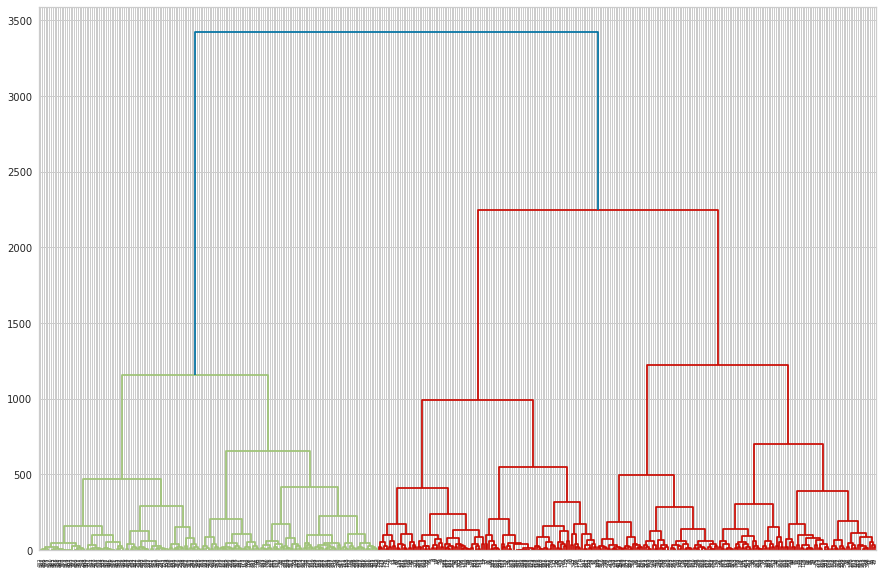

In [24]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize = (15,10))
dendrogram = sch.dendrogram(sch.linkage(data, method = 'complete'))

* Dari dendogram kita dapat melihat jumlah cluster yang mungkin terbentuk adalah 3

In [25]:
# Membuat Cluster dengan Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "complete")
cluster.fit(data)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [26]:
# Jumlah datapoint tiap cluster
data['Cluster'] = cluster.labels_

data['Cluster'].value_counts()

1    190
0    157
2    123
Name: Cluster, dtype: int64

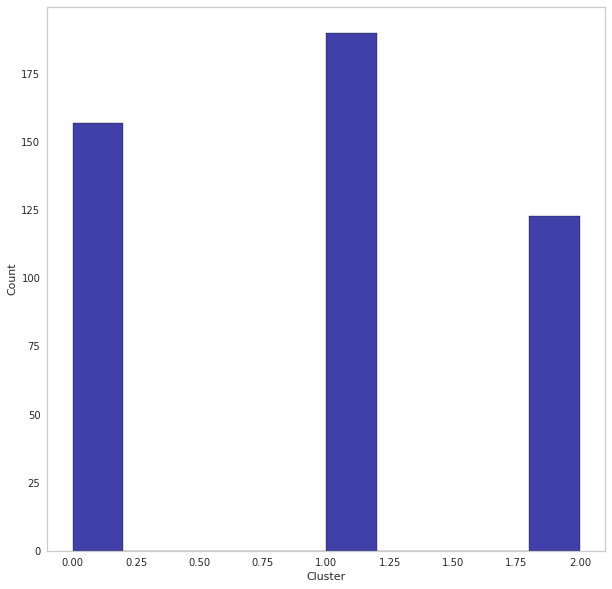

In [27]:
data = data.sort_values("Cluster")

plt.figure(figsize = (10,10))
plt.axes(facecolor = 'white')
sns.histplot(data.Cluster, color = "darkblue")
plt.grid()
plt.show()

In [28]:
# Mendapatkan centroid masing-masing cluster
from sklearn.neighbors import NearestCentroid

clf = NearestCentroid()
clf.fit(data, cluster.labels_)
print(clf.centroids_)

[[2.06305732e+01 1.56624204e+01 1.40556051e+03 1.94904459e+00
  1.51592357e+00 1.34012739e+01 6.52229299e+00 7.38853503e-01]
 [2.34736842e+01 1.98105263e+01 1.77650000e+03 1.90000000e+00
  1.36315789e+00 1.36421053e+01 6.28947368e+00 1.36842105e+00]
 [2.07560976e+01 1.56585366e+01 1.40460976e+03 2.59349593e+00
  1.56097561e+00 1.59593496e+01 7.90243902e+00 4.87804878e-01]]


### Visualizing

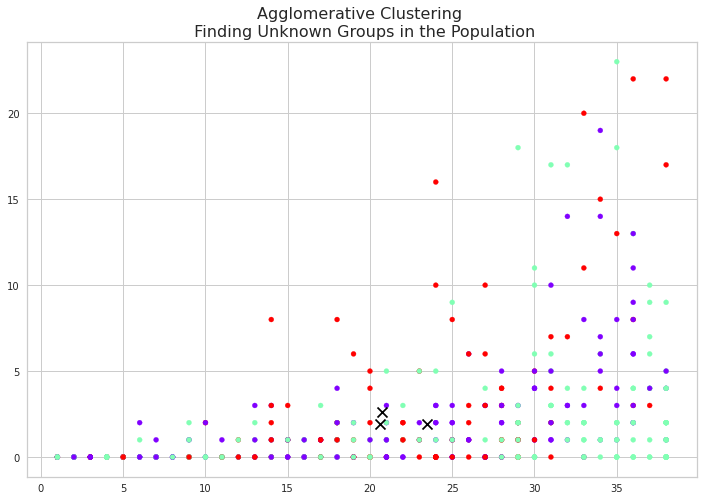

In [29]:
fig = plt.figure(figsize = (12,8))

plt.scatter(data.iloc[:,0], data.values[:,3], c = cluster.labels_, cmap="rainbow", s = 25)
plt.scatter(clf.centroids_[:,0], clf.centroids_[:,3], color = 'black', marker = "x", s = 100)
plt.title("Agglomerative Clustering \n Finding Unknown Groups in the Population", fontsize=16)
plt.show()